<h1>House Prices</h1>
<h2>A linear regression aproach<h1

<h1>EDA</h1>

In [14]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
# import data
df = pd.read_csv("./data/house_prices.csv")

In [16]:
# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
# Select only columns with string values
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
# Lowercase and replace spaces with underscores for values in all string
# columns of the DataFrame
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [17]:
# train, test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split((df.drop('saleprice', axis=1)), df['saleprice'], test_size=0.33, random_state=42)

<h1>2. So... What to expect?</h1>
<p>In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.</p>
<p>We can create a dataframe with the the folowing columns</p>
<dl>
    <dt><strong>Variable</strong></dt>
    <dd><em></em></dd>
    <dt><strong>Type</strong></dt>
    <dd><em></em></dd>
    <dt><strong>Segent</strong></dt>
    <dd><em></em></dd>
    <dt><strong>Expectation</strong></dt>
    <dd><em></em></dd>
    <dt><strong>Conclusion</strong></dt>
    <dd><em></em></dd>
</dl>
<p>While 'Type' and 'Segment' are just for future reference, The column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the descriptions on all variables and, one by one, ask ourselves:
    <ul>
        <li>Do we think about this variable when we're buying a house?</li>
        <li>If so, how important would this variable be?</li>
        <li>Is this information already described in any other variable?</li>
    </ul>
<p>example:</p>
<p><em>When we think about buying a car, do we care about it?</em></p>
<p><em>Whats the impact of having 'Excellent' <strong>variable</strong> instead of 'Poor'? And of having 'Excelent' <strong>variable</strong> instead of 'good'?</em></p>
<p><em>If variable has any duplicates, are they real duplicates?</em></p>
<p>After this daunting exercise, we can look carefully to the variables with 'High' expectation. Then we can run some scatterplots between those variables and teh target variable, filling the 'Conclusion' column wich is just a correction of our expectations.</p>

<p>I went through this process and concluded that the following variables play an important role</p>
<p>...</p>
<p>The main point of this exercise was to think a little about our data and expectations</p>

<h1>2. Analysing target variable</h1>


In [33]:
# Descriptive statistics summary
y_train.describe()

count       978.000000
mean     181046.955010
std       76175.965601
min       34900.000000
25%      130000.000000
50%      164995.000000
75%      215000.000000
max      625000.000000
Name: saleprice, dtype: float64

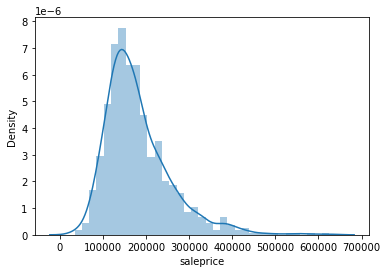

In [35]:
# Histogram
sns.distplot(y_train);

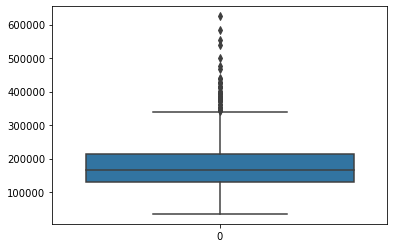

In [37]:
# Boxplot
sns.boxplot(data=y_train);

<p1>We can see a lot of outliers. But are they really outliers?</p>

<p>I see that you:</p>
<ul>
    <li><strong>Deviate from the normal distribution.</strong></li>
    <li><strong>Have appreciable positive skewness.</strong></li>
    <li><strong>Show peakedness.</strong></li>
</ul>

In [38]:
# skewness and kurtosis
print(f"Skewness: {y_train.skew()}")
print(f"Kurtosis: {y_train.kurt()}")

Skewness: 1.5354885846498618
Kurtosis: 3.7805185447047553


<h2>Relationship with numerical variables</h2>
<p>We analyse 3 of the expected variables with 'High' impact on 'saleprice'</p>

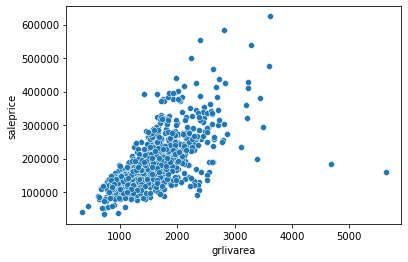

In [43]:
# Scatterplot
var = 'grlivarea'
sns.scatterplot(X_train[var], y_train);

<h2>Relationship with categorical features</h2>

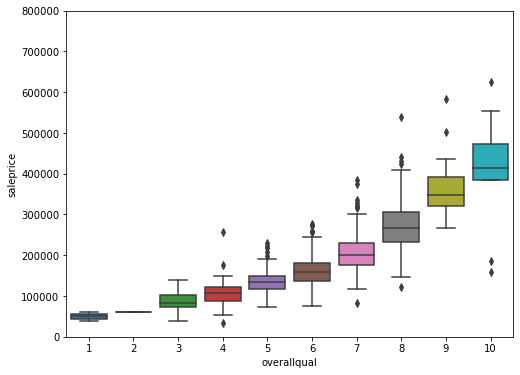

In [46]:
# Boxplot
var='overallqual'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=X_train[var], y=y_train)
fig.axis(ymin=0, ymax=800000);

<h1>3. Work Smart</h1>

<h2>The 'plasma soup'</h2>
<ul>
    <li>correlation matrix (hearmap style)</li>
    <li>'saleprice' correlation matrix (zoomed heatmap style)</li>
    <li>Scatterplots between the most correlated variables</li>
</ul>

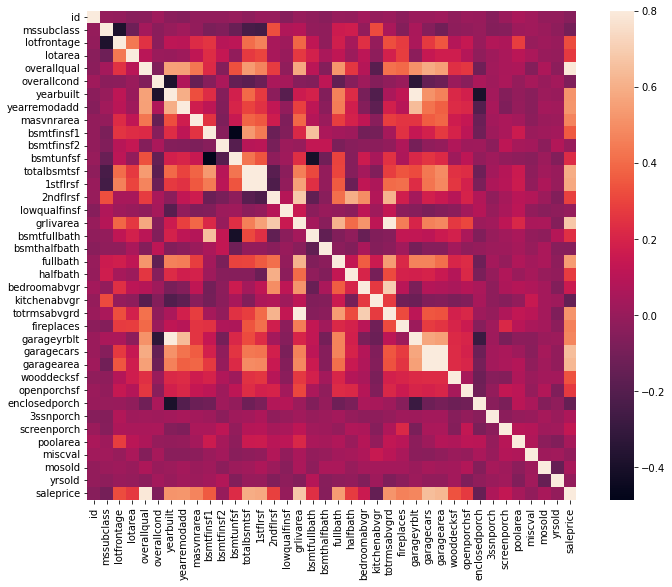

In [59]:
# Correlation matrix
X_train['saleprice'] = y_train
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

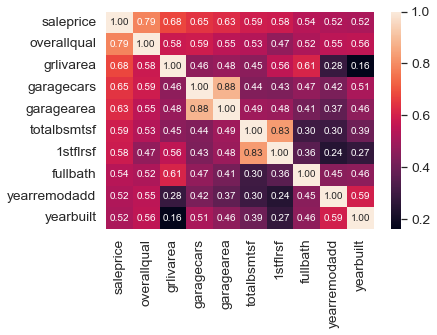

In [66]:
# saleprice correlation matrix
k=10 #number of variables for heatmap
cols=corrmat.nlargest(k, 'saleprice')['saleprice'].index
cm = np.corrcoef(X_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()
                                                                 

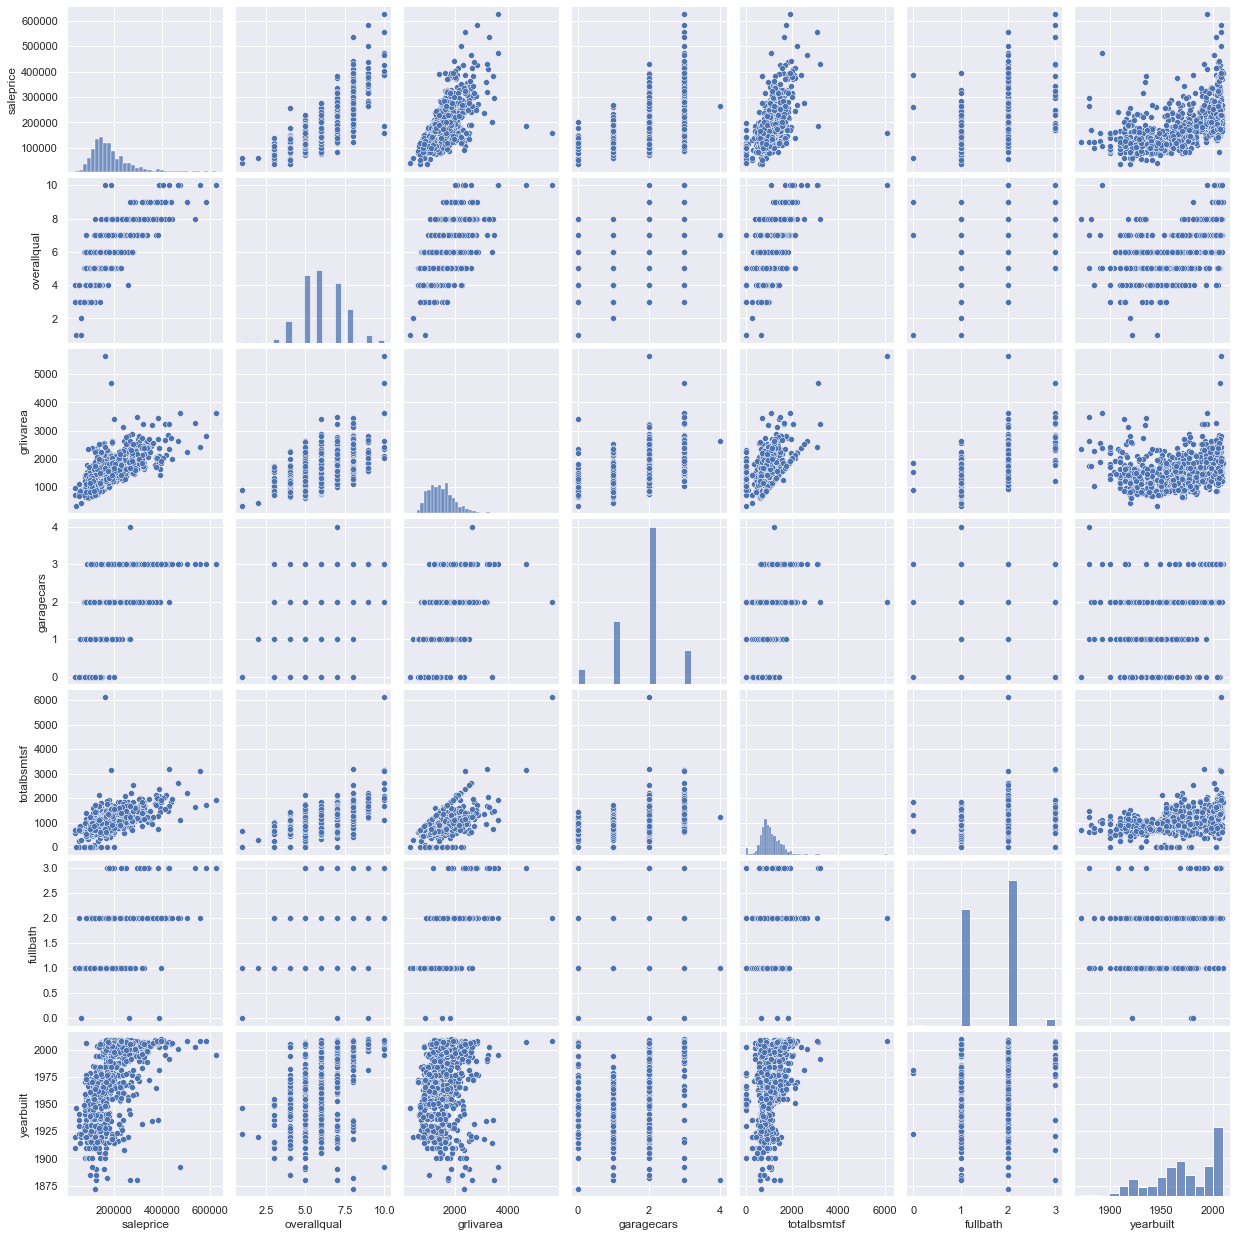

In [71]:
# Scatterplot
sns.set()
cols=[ 'saleprice', 'overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf',
      'fullbath', 'yearbuilt']
sns.pairplot(X_train[cols], size=2.5);